In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def display_image(image, title='Image'):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

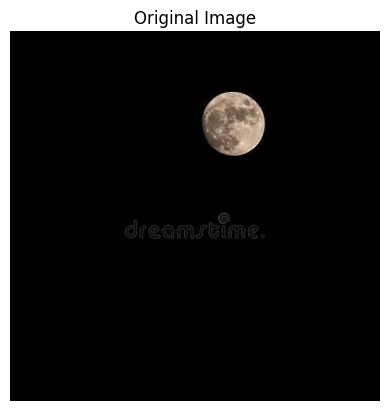

In [3]:
path="imgs/1.jpg"

img = cv2.imread(path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis('off')
plt.show()

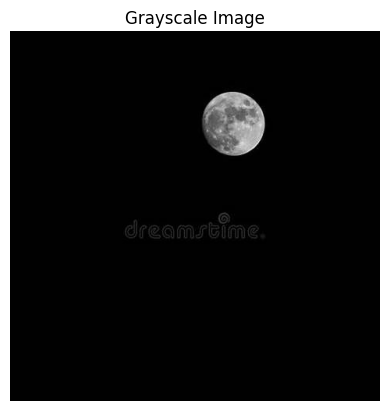

In [4]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

display_image(img_gray, title="Grayscale Image")

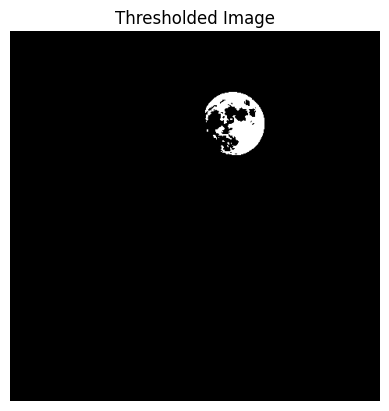

In [5]:
# Only take white pixels into account
ret,thresh = cv2.threshold(img_gray,127,255,0)

display_image(thresh, title="Thresholded Image")

# How to compute the center of the moon?

We need to compute the moments of the thresholded image. Moments are quantitative measures that capture the shape, orientation, and distribution of pixel intensities in an image. <br>
They are computed in this way for a grayscale: <br><br>
$$M_{pq}=\sum_{x} \sum_{y} x^p y^q I(x,y)$$ 
where $I(x,y)$ is the value of the pixel at x,y <br>
$M_{00}$ is the area of the picture and $\frac{M_{10}}{M_{00}}$, $\frac{M_{01}}{M_{00}}$ will give the centeroids of the picture

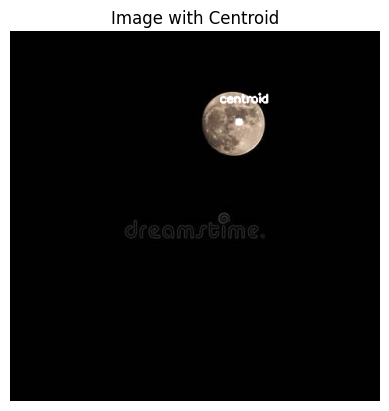

In [6]:
# Calculate the moments of the thresholded image
M = cv2.moments(thresh)

# Centeroids
cX = int(M["m10"] / M["m00"])
cY = int(M["m01"] / M["m00"])


cv2.circle(img, (cX, cY), 5, (255, 255, 255), -1)
cv2.putText(img, "centroid", (cX - 25, cY - 25),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
 
display_image(img, title="Image with Centroid")

Now we just need to compute the distance from the horizontal center 

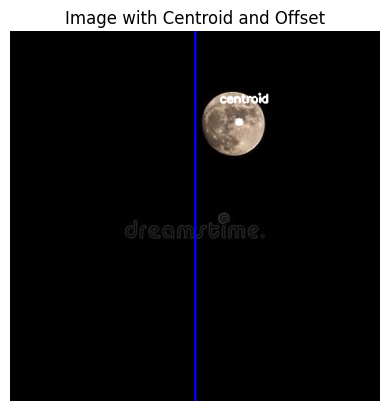

Offset from center: 56 pixels


In [7]:
center_x = img.shape[1] // 2
offset = cX - center_x

cv2.line(img, (center_x, 0), (center_x, img.shape[0]), (255, 0, 0), 2)

display_image(img, title="Image with Centroid and Offset")
print(f"Offset from center: {offset} pixels")

# Problem with this method

The method used above has problems when there are "outliers" like artificial light polluting, lots of stars, etc... <br>
In the example below you can see that the centroid is shifted from the moon center

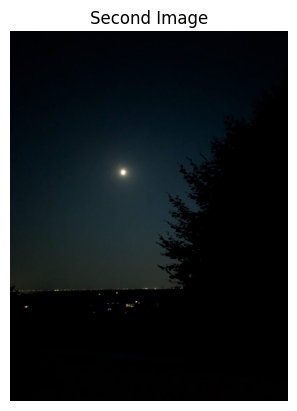

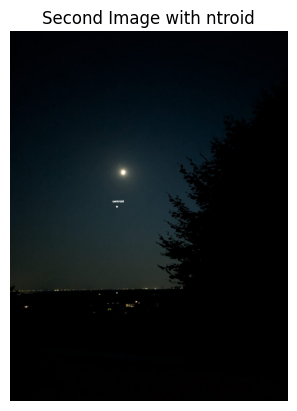

In [30]:
img2 = cv2.imread("imgs/10.jpeg")
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

display_image(img2, title="Second Image")
ret2,thresh2 = cv2.threshold(img2_gray,127,255,0)
M2 = cv2.moments(thresh2)
cX2 = int(M2["m10"] / M2["m00"])
cY2 = int(M2["m01"] / M2["m00"])
cv2.circle(img2, (cX2, cY2), 5, (255, 255, 255), -1)
cv2.putText(img2, "centroid", (cX2 - 25, cY2 - 25), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
display_image(img2, title="Second Image with ntroid")

# The solution

We can use a filter (kernel) to eliminate smaller objects that are not the moon

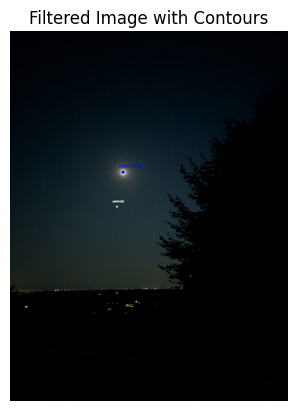

In [31]:
_, thresh2 = cv2.threshold(img2_gray, 200, 255, cv2.THRESH_BINARY)

kernel = np.ones((5, 5), np.uint8)
cleaned = cv2.morphologyEx(thresh2, cv2.MORPH_OPEN, kernel)

M2 = cv2.moments(cleaned)
cX2 = int(M2["m10"] / M2["m00"])
cY2 = int(M2["m01"] / M2["m00"])

cv2.circle(img2, (cX2, cY2), 9, (255, 0, 0), -1)
cv2.putText(img2, "centroid", (cX2 - 25, cY2 - 25), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

display_image(img2, title="Filtered Image with Contours")